Dominant frequency: 31.99 Hz


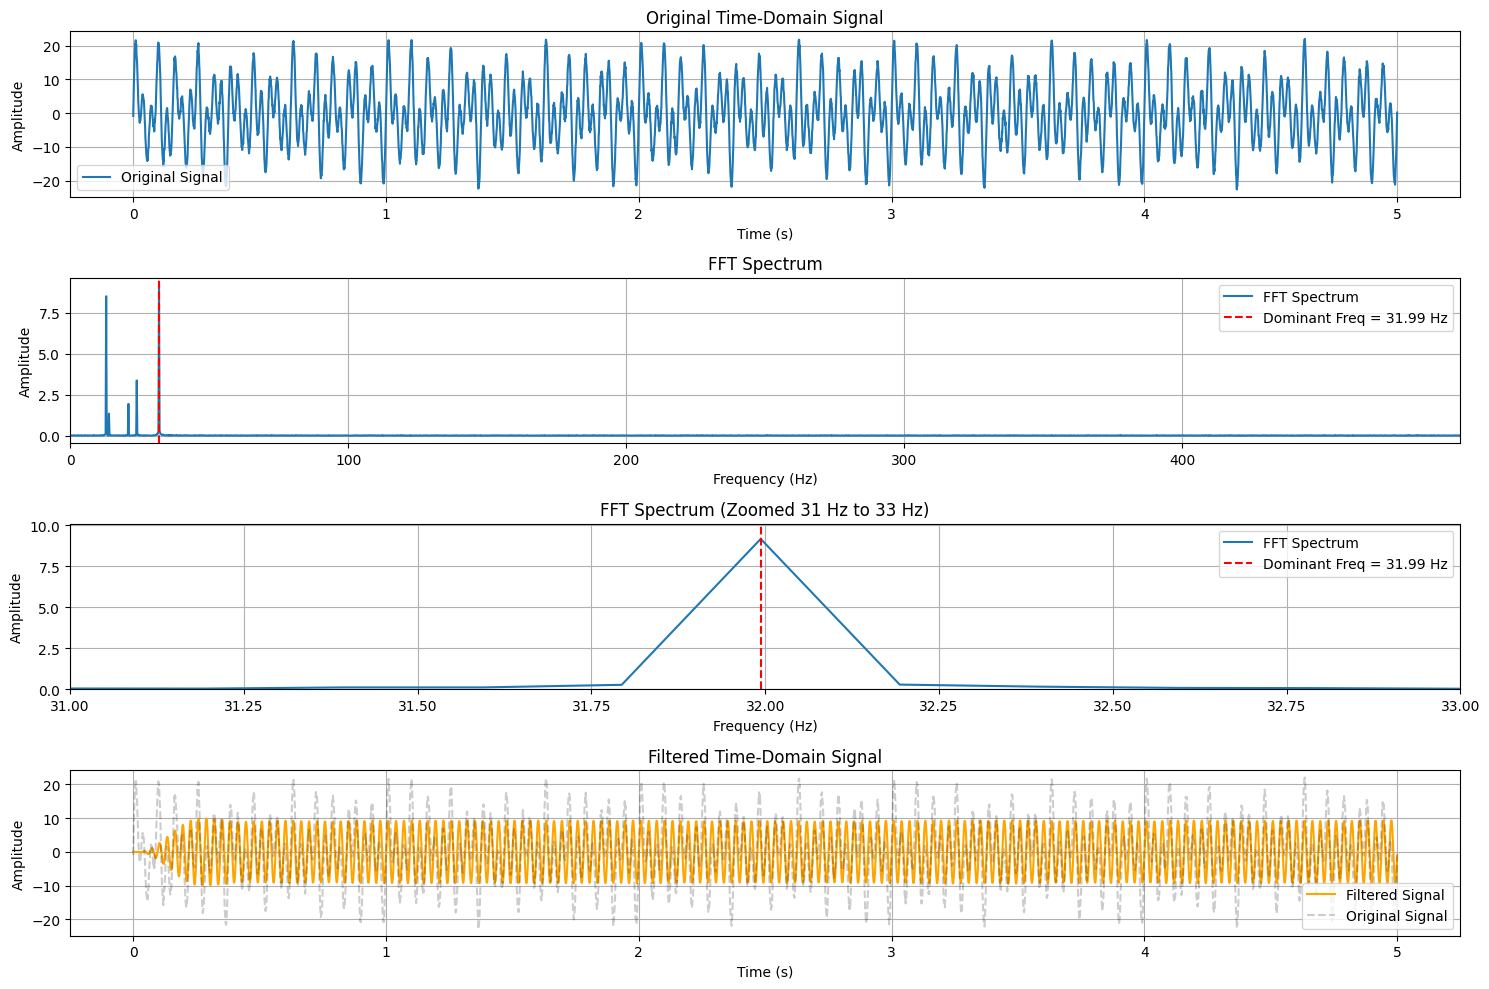

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 1. Load the CSV file
data = pd.read_csv('signal_122140055.csv')
time = data['time'].values
amplitude = data['amplitude'].values

# Calculate sampling rate
dt = time[1] - time[0]  # Time step (assuming uniform sampling)
fs = 1 / dt  # Sampling frequency in Hz

# 2. Perform FFT
N = len(amplitude)
yf = np.fft.fft(amplitude)
xf = np.fft.fftfreq(N, dt)[:N//2]  # Positive frequencies only
amplitude_spectrum = 2.0/N * np.abs(yf[:N//2])  # Magnitude of FFT

# Find the dominant frequency (excluding DC component)
idx_max = np.argmax(amplitude_spectrum[1:]) + 1  # Skip DC (index 0)
dominant_freq = xf[idx_max]
print(f"Dominant frequency: {dominant_freq:.2f} Hz")

# 3. Design and apply bandpass filter
bandwidth = 0.1 * dominant_freq
lowcut = dominant_freq - bandwidth
highcut = dominant_freq + bandwidth

# Ensure frequencies are within Nyquist limit
nyquist = fs / 2
lowcut = max(lowcut, 0.1)  # Avoid zero or negative frequencies
highcut = min(highcut, nyquist * 0.99)  # Stay below Nyquist

# Design Butterworth bandpass filter
order = 4
b, a = signal.butter(order, [lowcut, highcut], fs=fs, btype='band')
filtered_signal = signal.lfilter(b, a, amplitude)

# 4. Plot the results
plt.figure(figsize=(15, 10))

# Plot original signal
plt.subplot(4, 1, 1)
plt.plot(time, amplitude, label='Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Time-Domain Signal')
plt.grid(True)
plt.legend()

# Plot FFT spectrum (full range)
plt.subplot(4, 1, 2)
plt.plot(xf, amplitude_spectrum, label='FFT Spectrum')
plt.axvline(dominant_freq, color='r', linestyle='--', label=f'Dominant Freq = {dominant_freq:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum')
plt.grid(True)
plt.legend()
plt.xlim(0, fs/2)  # Limit x-axis to Nyquist frequency
# Plot FFT spectrum (zoomed to 31 Hz to 33 Hz)
plt.subplot(4, 1, 3)
plt.plot(xf, amplitude_spectrum, label='FFT Spectrum')
plt.axvline(dominant_freq, color='r', linestyle='--', label=f'Dominant Freq = {dominant_freq:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum (Zoomed 31 Hz to 33 Hz)')
plt.grid(True)
plt.legend()
plt.xlim(31, 33)  # Zoom to 31 Hz to 33 Hz
# Adjust y-axis to focus on the relevant amplitude range in this frequency band
idx_range = (xf >= 31) & (xf <= 33)
plt.ylim(0, max(amplitude_spectrum[idx_range]) * 1.1)  # Add 10% margin above max amplitude in range

# Plot filtered signal
plt.subplot(4, 1, 4)
plt.plot(time, filtered_signal, label='Filtered Signal', color='orange')
plt.plot(time, amplitude, 'k--', alpha=0.2, label='Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Time-Domain Signal')
plt.grid(True)
plt.legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()

<body>
<div text align = center>
  <h2><strong>Analisis dan <em>Filtering</em> Sinyal Menggunakan <em>FFT</em></strong></h2>
</div>

---

<h3><strong>Gambaran Umum Proses</strong></h3>
<p>
Proses ini melibatkan analisis sinyal dalam domain waktu untuk diekstrak menjadi representasi domain frekuensi menggunakan <em>Fast Fourier Transform (FFT)</em>. Komponen frekuensi dominan diidentifikasi dan disaring menggunakan <em>bandpass filter</em>. Visualisasi yang disediakan meliputi:
</p>
<ol>
  <li><strong>Sinyal Asli dalam Domain Waktu</strong>: Data amplitudo mentah terhadap waktu.</li>
  <li><strong>Spektrum <em>FFT</em> (Rentang Penuh)</strong>: Hasil dekomposisi spektral yang menunjukkan kandungan frekuensi dari sinyal.</li>
  <li><strong>Spektrum <em>FFT</em> (Zoom 31 Hz hingga 33 Hz)</strong>: Fokus pada area frekuensi di sekitar komponen dominan.</li>
  <li><strong>Sinyal yang Telah Difilter</strong>: Rekonstruksi sinyal setelah penyaringan, mempertahankan hanya komponen dominan.</li>
</ol>

<h3><strong>Analogi</strong></h3>
<p>
Analogi yang digunakan adalah seperti menghadiri sebuah pesta di mana banyak orang berbicara secara bersamaan. Tujuannya adalah untuk memfokuskan pendengaran pada suara terkuat di tengah kebisingan:
</p>
<ul>
  <li><strong>Sinyal Asli</strong>
    <p>Seperti campuran percakapan yang kacau, sinyal domain waktu menangkap tumpang tindih berbagai frekuensi dalam satu waktu. Mewakili hasil superposisi seluruh percakapan yang terjadi secara bersamaan. Fluktuasi amplitudo terhadap waktu mencerminkan campuran berbagai komponen frekuensi.</p>
  </li>
  <li><strong>Spektrum <em>FFT</em></strong>: 
    <p>Transformasi ke domain frekuensi melalui <em>FFT</em> memisahkan sinyal menjadi frekuensi-frekuensi komponennya. Spektrum amplitudo menunjukkan puncak signifikan di 31,99 Hz, yang mengindikasikan keberadaan komponen dominan di antara puncak-puncak kecil lainnya akibat kebisingan latar.</p>
  </li>
  <li><strong>Spektrum <em>FFT</em> (Zoom 31–33 Hz)</strong>: 
    <p>Memfokuskan pengamatan pada frekuensi sempit (31–33 Hz) memungkinkan identifikasi yang lebih akurat terhadap komponen utama. Aktivitas frekuensi di sekitar area tersebut sangat minimal, memperkuat keyakinan bahwa inilah frekuensi yang perlu disaring. </p>
  </li>
  <li><strong>Sinyal yang Telah Difilter</strong>: 
    <p>Aplikasi <em>bandpass filter</em> berperan seperti headphone dengan fitur <em>Active Noise Cancelling (ANC)</em>, hanya membiarkan frekuensi target melewati, sehingga menghasilkan sinyal yang lebih bersih dan fokus.</p>
  </li>
</ul>

---

<div text align=center>
  <h3><strong>Lampiran</strong></h3>
</div>

---

<ul>
  <li>
    <p><strong>Percakapan dengan LLM</strong>
      <a href="https://grok.com/share/bGVnYWN5_51e039ac-3038-49fa-8564-5087521f9ee3" target="_blank">GROK AI</a>
  </li>
  <li>
    </p>
    <p><strong>CSV File (Gunakan Akun Email ITERA)</strong>
      <a href="https://drive.google.com/file/d/1l6uOmEyhUUeeV2aUqV5buXzijC8md_4j/view?usp=drive_link" target="_blank">CSV File </a>
    </p>
  </li>
</body>